## **Teste T Pareado**

Compara as médias de duas amostras relacionadas (ou pareadas), onde há um fator de dependência entre as amostras.

*Weekend effect: o retorno da segunda-feira é frequentemente menor que o da sexta-feira que a precede*


### **Teste 1: 2022 até a atualidade**

Esse efeito ainda pode ser visto nos retornos do IBOV, desde 2022 até a atualidade?

- Hipótese H0 (nula): As médias de retorno não diferem estatisticamente
- Hipótese H1 (alternativa): As médias de retorno diferem estatisticamente

In [1]:
import pandas as pd
from scipy import stats
import pylab
import yfinance as yf
import plotly.graph_objects as go
import numpy as np

Obter os dados do IBOV e calcular os retornos diários (%) de 01/Jan/2022 até a atualidade

In [2]:
dados_ibov = yf.download('^BVSP', start='2022-01-01')
dados_ibov['retornos'] = dados_ibov.Close.pct_change()*100
dados_ibov.dropna()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,retornos
Date,,,,,,,
2022-01-04,103922.000000,104276.000000,103096.000000,103514.000000,103514.000000,11491600,-0.392602
2022-01-05,103514.000000,103514.000000,100850.000000,101006.000000,101006.000000,0,-2.422861
2022-01-06,101006.000000,102235.000000,101000.000000,101561.000000,101561.000000,11749200,0.549472
2022-01-07,101561.000000,102719.000000,101104.000000,102719.000000,102719.000000,11733200,1.140201
2022-01-10,102719.000000,102719.000000,101038.000000,101945.000000,101945.000000,10264700,-0.753512
...,...,...,...,...,...,...,...
2024-08-02,127395.000000,128104.000000,125731.000000,125854.000000,125854.000000,9950900,-1.209624
2024-08-05,125851.000000,125851.000000,123073.000000,125270.000000,125270.000000,10886100,-0.464030
2024-08-06,125270.000000,126966.000000,125261.000000,126267.000000,126267.000000,10052600,0.795881


Organizar os dados para obtenção dos dias da semana e da semana do ano:

- Adiciona novas colunas "dias da semana", "número para os dias", "número da semana", "ano" e "número para o ano"  
- Combina as colunas 'ano' e 'semana_ano' em uma única coluna 'ano_semana', criando um identificador único para cada semana do ano  
- Remove quaisquer linhas do DataFrame que contenham valores nulos (NaN)


In [3]:
dados_ibov['dia_semana'] = dados_ibov.index.day_name()
dados_ibov['dia_semana_num'] = dados_ibov.index.day_of_week
dados_ibov['semana_ano'] = dados_ibov.index.isocalendar().week
dados_ibov['ano'] = dados_ibov.index.year

dados_ibov['ano_semana'] = dados_ibov['ano'].astype(str) + "_" + dados_ibov['semana_ano'].astype(str)

dados_ibov.dropna()

,Open,High,Low,Close,Adj Close,Volume,retornos,dia_semana,dia_semana_num,semana_ano,ano,ano_semana
Date,,,,,,,,,,,,
2022-01-04,103922.000000,104276.000000,103096.000000,103514.000000,103514.000000,11491600,-0.392602,Tuesday,1,1,2022,2022_1
2022-01-05,103514.000000,103514.000000,100850.000000,101006.000000,101006.000000,0,-2.422861,Wednesday,2,1,2022,2022_1
2022-01-06,101006.000000,102235.000000,101000.000000,101561.000000,101561.000000,11749200,0.549472,Thursday,3,1,2022,2022_1
2022-01-07,101561.000000,102719.000000,101104.000000,102719.000000,102719.000000,11733200,1.140201,Friday,4,1,2022,2022_1
2022-01-10,102719.000000,102719.000000,101038.000000,101945.000000,101945.000000,10264700,-0.753512,Monday,0,2,2022,2022_2
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-02,127395.000000,128104.000000,125731.000000,125854.000000,125854.000000,9950900,-1.209624,Friday,4,31,2024,2024_31
2024-08-05,125851.000000,125851.000000,123073.000000,125270.000000,125270.000000,10886100,-0.464030,Monday,0,32,2024,2024_32
2024-08-06,125270.000000,126966.000000,125261.000000,126267.000000,126267.000000,10052600,0.795881,Tuesday,1,32,2024,2024_32


Filtrar os dados de interesse para teste t pareado, que compara os retornos das segundas-feiras com os retornos das sextas-feiras que as precedem:  

- Filtra o DataFrame 'dados_ibov' para incluir apenas as linhas onde o dia da semana é segunda-feira ('Monday') ou sexta-feira ('Friday')

In [4]:
dados_seg_sex = dados_ibov[(dados_ibov['dia_semana']=='Monday') | (dados_ibov['dia_semana']=='Friday')]
dados_seg_sex.dropna()

,Open,High,Low,Close,Adj Close,Volume,retornos,dia_semana,dia_semana_num,semana_ano,ano,ano_semana
Date,,,,,,,,,,,,
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200,1.140201,Friday,4,1,2022,2022_1
2022-01-10,102719.0,102719.0,101038.0,101945.0,101945.0,10264700,-0.753512,Monday,0,2,2022,2022_2
2022-01-14,105530.0,107062.0,105028.0,106928.0,106928.0,11457100,1.324742,Friday,4,2,2022,2022_2
2022-01-17,106927.0,106928.0,106097.0,106692.0,106692.0,6924200,-0.220709,Monday,0,3,2022,2022_3
2022-01-21,109097.0,109786.0,108368.0,108942.0,108942.0,13408400,-0.146652,Friday,4,3,2022,2022_3
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-22,127616.0,128151.0,127456.0,127860.0,127860.0,6098200,0.191199,Monday,0,30,2024,2024_30
2024-07-26,125964.0,127700.0,125953.0,127492.0,127492.0,8272000,1.221081,Friday,4,30,2024,2024_30
2024-07-29,127492.0,127657.0,126606.0,126954.0,126954.0,7075400,-0.421987,Monday,0,31,2024,2024_31


Tabela dinâmica com a média e erro padrão da média para segundas e sextas:

O "erro padrão" refere-se ao erro padrão da média (Standard Error of the Mean - SEM). É uma medida estatística que indica quão próximas as médias amostrais estão da média da população de onde a amostra foi retirada. Matematicamente, o erro padrão é calculado dividindo o desvio padrão da amostra pelo raiz quadrada do número de observações na amostra. Quanto menor o erro padrão, mais precisa é a estimativa da média da população baseada na média amostral. Neste código foi usado o método ".sem()" da biblioteca Pandas

- Criar uma tabela dinâmica que agrupa os dados por número do dia da semana e nome do dia da semana, calculando a média dos retornos para cada grupo. Isso resulta em médias separadas para segundas e sextas-feiras  
- Remover o nível desnecessário do índice da tabela resultante  
- Criar outra tabela dinâmica que calcula o erro padrão da média (SEM) dos retornos para cada grupo (segundas e sextas-feiras)  
- Remover novamente o nível desnecessário do índice 

- Concatenar as tabelas de médias e erros padrão lado a lado, resultando em um DataFrame que contém ambas as estatísticas para cada dia da semana  
- Renomear as colunas da tabela concatenada para 'Media_retornos' e 'SEM_retornos'

In [5]:
dados_media = dados_seg_sex[['dia_semana_num','dia_semana','retornos']].groupby(['dia_semana_num','dia_semana']).mean()
dados_media = dados_media.droplevel(0, axis=0)
dados_sem = dados_seg_sex[['dia_semana_num','dia_semana','retornos']].groupby(['dia_semana_num','dia_semana']).sem()
dados_sem = dados_sem.droplevel(0, axis=0)

dados_desde_2010 = pd.concat([dados_media, dados_sem], axis=1)
dados_desde_2010.columns = ['Media_retornos', 'SEM_retornos']
dados_desde_2010

,Media_retornos,SEM_retornos
dia_semana,,
Monday,-0.061196,0.102627
Friday,0.028745,0.105321


Visualizando os dados da tabela acima

In [6]:
fig = go.Figure()

fig.add_trace(go.Bar(name='Retornos', x=dados_desde_2010.index, y=dados_desde_2010.Media_retornos,
                     error_y=dict(type='data', array=dados_desde_2010.SEM_retornos),
                     marker_color='lightgreen', orientation='v'))

fig.update_layout(title_text='<b>Retornos IBOV</b> (média \xB1 erro padrão da média) por dia da semana <br><b>Desde 2022', xaxis_title= '<b>Dia da semana',
                  yaxis_title= '<b>Retorno médio diário (%)', template="none", margin=dict(l=75, r=20, t=75, b=75),
                  paper_bgcolor="#f7f8fa", font=dict(family="Arial", size=13, color="black"), width=900, height=400)

fig.show()

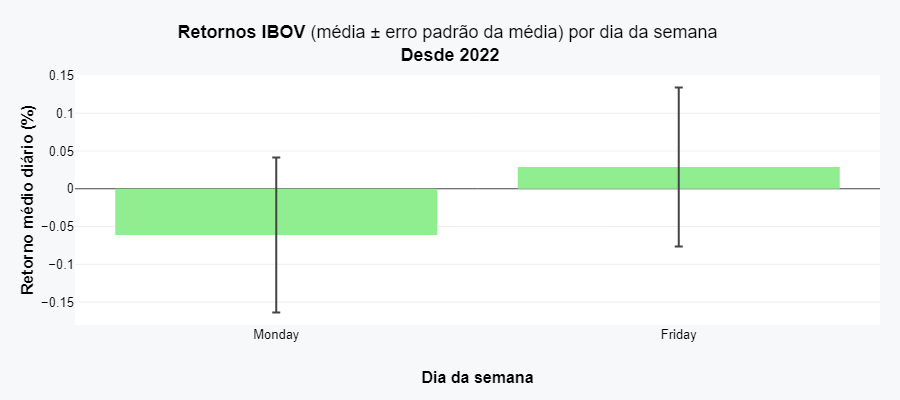
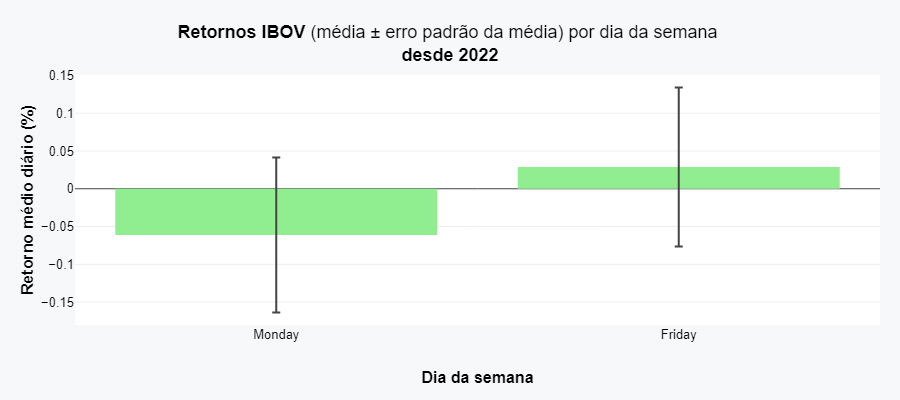

Formato para T pareado:  

- Um dicionário vazio é criado para armazenar os dados relevantes para o teste t pareado. As chaves do dicionário representam as colunas do DataFrame final  

- O loop percorre o DataFrame 'dados_seg_sex' começando do segundo elemento até o último, verificando condições específicas entre elementos consecutivos para identificar transições de sexta-feira para segunda-feira dentro do mesmo ano. Quando encontra uma transição que atende aos critérios, ele registra as informações no dicionário criado: 'dados' 

In [7]:
dados = {'Data':[], 'Monday':[], 'Friday':[], 'Week_monday':[], 'Week_friday':[]}

for i in range(1,len(dados_seg_sex)):
  if (dados_seg_sex.iloc[i-1]['dia_semana']=='Friday') and (dados_seg_sex.iloc[i]['dia_semana']=='Monday'):
    if dados_seg_sex.iloc[i-1]['semana_ano']==(dados_seg_sex.iloc[i]['semana_ano']-1):
      dados['Data'].append(dados_seg_sex.index[i])
      dados['Monday'].append(dados_seg_sex.iloc[i]['retornos'])
      dados['Week_monday'].append(dados_seg_sex.iloc[i]['ano_semana'])
      dados['Friday'].append(dados_seg_sex.iloc[i-1]['retornos'])
      dados['Week_friday'].append(dados_seg_sex.iloc[i-1]['ano_semana'])

df_analise = pd.DataFrame(dados)

In [8]:
df_analise.head(10)

,Data,Monday,Friday,Week_monday,Week_friday
0,2022-01-10,-0.753512,1.140201,2022_2,2022_1
1,2022-01-17,-0.220709,1.324742,2022_3,2022_2
2,2022-01-24,-1.092324,-0.146652,2022_4,2022_3
3,2022-01-31,0.816305,-0.745225,2022_5,2022_4
4,2022-02-07,-0.221836,0.491513,2022_6,2022_5
5,2022-02-14,0.206917,0.187899,2022_7,2022_6
6,2022-02-21,-0.924908,-0.669438,2022_8,2022_7
7,2022-03-07,-2.516729,-0.600872,2022_10,2022_9
8,2022-03-14,-1.597844,-1.715598,2022_11,2022_10
9,2022-03-21,0.731934,1.976547,2022_12,2022_11


##### **No Teste T Pareado, é obrigatório verificar se há normalidade entre as duas amostras antes de realizar o Teste de Hipótese. É calculado a diferença entre as observações (as duas variáveis). Verificar se a diferença representa uma distribuição normal.**

Diferença entre os retornos de sexta e segunda subsequente:

- Calcular a diferença entre os retornos de sexta-feira e os retornos de segunda-feira subsequente para cada par de dias. Essa diferença é armazenada em uma nova coluna 'diff_sex_seg' no DataFrame df_analise

In [9]:
df_analise['diff_sex_seg'] = df_analise.Friday - df_analise.Monday

Verificar se a diferença entre os retornos de sexta e segunda-feira segue uma distribuição normal. A hipótese nula (H0) é de que a distribuição é normal

In [10]:
teste_normalidade = stats.normaltest(df_analise['diff_sex_seg'])
print(teste_normalidade)

NormaltestResult(statistic=5.236286394977943, pvalue=0.07293816894543872)


##### **Teste de normalidade, p-valor de 0.073, maior que 0.05. As diferenças entre os retornos de sexta e segunda-feira seguem uma distribuição aproximadamente normal. Portanto, o Teste T Pareado é válido para este conjunto de dados.**

Q-Q Plot, outro teste de normalidade

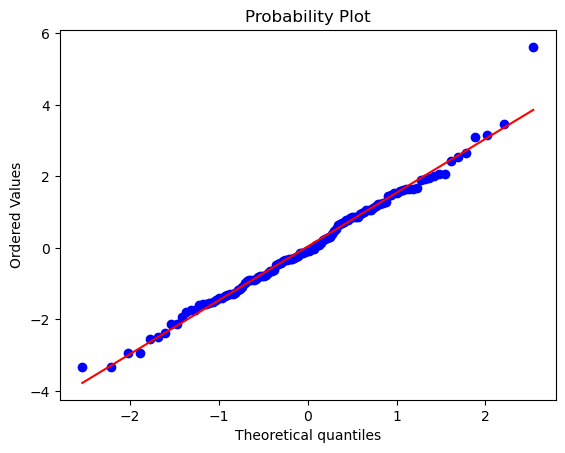

In [11]:
stats.probplot(df_analise.diff_sex_seg, dist="norm", plot=pylab)
pylab.show()

**Teste estatístico**

*Pergunta: a média dos retornos da segunda-feira é estatisticamente menor que a média dos retornos da sexta-feira que a precede?*

* Hipótese H0 (nula): As médias de retorno <u>não diferem</u> estatisticamente
* Hipótese H1 (alternativa): As médias de retorno  <u>diferem</u> estatisticamente

In [12]:
stats.ttest_rel(df_analise.Monday, df_analise.Friday)

TtestResult(statistic=-0.30041567725310847, pvalue=0.7643672710143482, df=123)

##### **Teste T Pareado com p-valor de 0.764, maior que 0.05. Não há evidências suficientes para rejeitar a hipótese nula, o que implica que as médias de retorno de sexta-feira e segunda-feira não diferem estatisticamente.**  
##### **Isso sugere que o "weekend effect" não está presente no período analisado (2022 até a atualidade).**

### **Teste 2: Todo o período histórico**

Aumentando o período analisado para todo o histórico do Ibovespa:  
Há uma chance maior de rejeitar a hipótese nula (H0) e detectar um efeito significativo, corroborando o "Weekend effect"?

- Hipótese H0 (nula): As médias de retorno não diferem estatisticamente
- Hipótese H1 (alternativa): As médias de retorno diferem estatisticamente

Baixar dados do IBOVESPA de 2010 a 2022

In [13]:
dados_ibov = yf.download('^BVSP')
dados_ibov['retornos'] = dados_ibov.Close.pct_change()*100
dados_ibov.dropna()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,retornos
Date,,,,,,,
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0,-0.816330
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0,-2.469130
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0,1.687762
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0,0.000000
1993-05-04,24.100000,25.000000,24.100000,24.900000,24.900000,0,3.319499
...,...,...,...,...,...,...,...
2024-08-02,127395.000000,128104.000000,125731.000000,125854.000000,125854.000000,9950900,-1.209624
2024-08-05,125851.000000,125851.000000,123073.000000,125270.000000,125270.000000,10886100,-0.464030
2024-08-06,125270.000000,126966.000000,125261.000000,126267.000000,126267.000000,10052600,0.795881


In [14]:
dados_ibov['dia_semana'] = dados_ibov.index.day_name()
dados_ibov['dia_semana_num'] = dados_ibov.index.day_of_week
dados_ibov['semana_ano'] = dados_ibov.index.isocalendar().week
dados_ibov['ano'] = dados_ibov.index.year

dados_ibov['ano_semana'] = dados_ibov['ano'].astype(str) + "_" + dados_ibov['semana_ano'].astype(str)

dados_ibov.dropna()

,Open,High,Low,Close,Adj Close,Volume,retornos,dia_semana,dia_semana_num,semana_ano,ano,ano_semana
Date,,,,,,,,,,,,
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0,-0.816330,Wednesday,2,17,1993,1993_17
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0,-2.469130,Thursday,3,17,1993,1993_17
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0,1.687762,Friday,4,17,1993,1993_17
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0,0.000000,Monday,0,18,1993,1993_18
1993-05-04,24.100000,25.000000,24.100000,24.900000,24.900000,0,3.319499,Tuesday,1,18,1993,1993_18
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-02,127395.000000,128104.000000,125731.000000,125854.000000,125854.000000,9950900,-1.209624,Friday,4,31,2024,2024_31
2024-08-05,125851.000000,125851.000000,123073.000000,125270.000000,125270.000000,10886100,-0.464030,Monday,0,32,2024,2024_32
2024-08-06,125270.000000,126966.000000,125261.000000,126267.000000,126267.000000,10052600,0.795881,Tuesday,1,32,2024,2024_32


In [15]:
dados_seg_sex = dados_ibov[(dados_ibov['dia_semana']=='Monday') | (dados_ibov['dia_semana']=='Friday')]
dados_seg_sex.dropna()

,Open,High,Low,Close,Adj Close,Volume,retornos,dia_semana,dia_semana_num,semana_ano,ano,ano_semana
Date,,,,,,,,,,,,
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0,1.687762,Friday,4,17,1993,1993_17
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0,0.000000,Monday,0,18,1993,1993_18
1993-05-07,25.600000,26.100000,25.500000,25.799999,25.799999,0,0.781246,Friday,4,18,1993,1993_18
1993-05-10,25.799999,25.799999,25.100000,25.200001,25.200001,0,-2.325576,Monday,0,19,1993,1993_19
1993-05-14,27.400000,27.900000,27.400000,27.799999,27.799999,0,1.459853,Friday,4,19,1993,1993_19
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-22,127616.000000,128151.000000,127456.000000,127860.000000,127860.000000,6098200,0.191199,Monday,0,30,2024,2024_30
2024-07-26,125964.000000,127700.000000,125953.000000,127492.000000,127492.000000,8272000,1.221081,Friday,4,30,2024,2024_30
2024-07-29,127492.000000,127657.000000,126606.000000,126954.000000,126954.000000,7075400,-0.421987,Monday,0,31,2024,2024_31


In [16]:
dados_media = dados_seg_sex[['dia_semana_num','dia_semana','retornos']].groupby(['dia_semana_num','dia_semana']).mean()
dados_media = dados_media.droplevel(0, axis=0)
dados_sem = dados_seg_sex[['dia_semana_num','dia_semana','retornos']].groupby(['dia_semana_num','dia_semana']).sem()
dados_sem = dados_sem.droplevel(0, axis=0)

dados_desde_2010 = pd.concat([dados_media, dados_sem], axis=1)
dados_desde_2010.columns = ['Media_retornos', 'SEM_retornos']
dados_desde_2010

,Media_retornos,SEM_retornos
dia_semana,,
Monday,-0.010608,0.056786
Friday,0.221391,0.056472


Visualizando os dados da tabela acima

In [17]:
fig = go.Figure()

fig.add_trace(go.Bar(name='Retornos', x=dados_desde_2010.index, y=dados_desde_2010.Media_retornos,
                     error_y=dict(type='data', array=dados_desde_2010.SEM_retornos),
                     marker_color='lightgreen', orientation='v'))

fig.update_layout(title_text='<b>Retornos IBOV</b> (média \xB1 erro padrão da média) por dia da semana <br><b>Dados históricos', xaxis_title= '<b>Dia da semana',
                  yaxis_title= '<b>Retorno médio diário (%)', template="none", margin=dict(l=75, r=20, t=75, b=75),
                  paper_bgcolor="#f7f8fa", font=dict(family="Arial", size=13, color="black"), width=900, height=400)

fig.show()

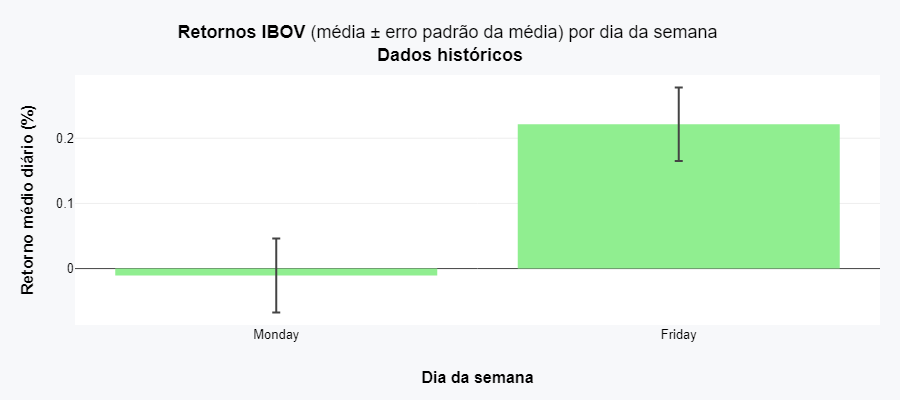

In [18]:
dados = {'Data':[], 'Monday':[], 'Friday':[], 'Week_monday':[], 'Week_friday':[]}

for i in range(1,len(dados_seg_sex)):
  if (dados_seg_sex.iloc[i-1]['dia_semana']=='Friday') and (dados_seg_sex.iloc[i]['dia_semana']=='Monday'):
    if dados_seg_sex.iloc[i-1]['semana_ano']==(dados_seg_sex.iloc[i]['semana_ano']-1):
      dados['Data'].append(dados_seg_sex.index[i])
      dados['Monday'].append(dados_seg_sex.iloc[i]['retornos'])
      dados['Week_monday'].append(dados_seg_sex.iloc[i]['ano_semana'])
      dados['Friday'].append(dados_seg_sex.iloc[i-1]['retornos'])
      dados['Week_friday'].append(dados_seg_sex.iloc[i-1]['ano_semana'])

df_analise = pd.DataFrame(dados)

In [19]:
df_analise.head(10)

,Data,Monday,Friday,Week_monday,Week_friday
0,1993-05-03,0.000000,1.687762,1993_18,1993_17
1,1993-05-10,-2.325576,0.781246,1993_19,1993_18
2,1993-05-17,5.395684,1.459853,1993_20,1993_19
3,1993-05-24,1.807224,3.750002,1993_21,1993_20
4,1993-05-31,0.000000,0.287363,1993_22,1993_21
5,1993-06-07,2.427184,0.980396,1993_23,1993_22
6,1993-06-14,0.668150,8.192775,1993_24,1993_23
7,1993-06-21,1.054852,0.636949,1993_25,1993_24
8,1993-06-28,2.681988,7.186858,1993_26,1993_25
9,1993-07-05,4.971324,0.000000,1993_27,1993_26


##### **No Teste T Pareado, é obrigatório verificar se há normalidade entre as duas amostras antes de realizar o Teste de Hipótese. É calculado a diferença entre as observações (as duas variáveis). Verificar se a diferença representa uma distribuição normal.**

In [20]:
df_analise['diff_sex_seg'] = df_analise.Friday - df_analise.Monday

In [21]:
teste_normalidade = stats.normaltest(df_analise['diff_sex_seg'])
print(teste_normalidade)

NormaltestResult(statistic=637.6090771950209, pvalue=3.5070994511762914e-139)


#### **O teste de normalidade resultou em um p-valor extremamente pequeno (3.51e-139), indicando que as diferenças entre os retornos de sexta-feira e segunda-feira não seguem uma distribuição normal.**  
#### **Isso compromete a validade do Teste T Pareado, que assume normalidade das diferenças. No "Teste 3" abaixo, será testada a tranformação logarítmica para verificação de normalidade.**

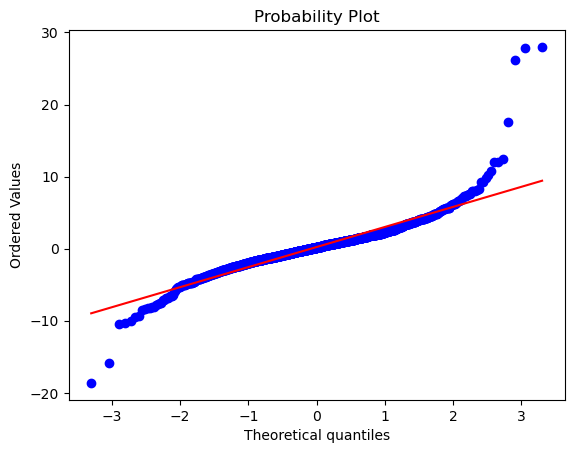

In [22]:
stats.probplot(df_analise.diff_sex_seg, dist="norm", plot=pylab)
pylab.show()

**Teste estatístico**

*Pergunta: a média dos retornos da segunda-feira é estatisticamente menor que a média dos retornos da sexta-feira que a precede?*

* Hipótese H0 (nula): As médias de retorno <u>não diferem</u> estatisticamente
* Hipótese H1 (alternativa): As médias de retorno  <u>diferem</u> estatisticamente

In [23]:
stats.ttest_rel(df_analise.Monday, df_analise.Friday)

TtestResult(statistic=-2.997416545988634, pvalue=0.002769115248440681, df=1449)

##### **Apesar da falta de normalidade, o Teste T Pareado foi aplicado, e o p-valor foi 0.0028, indicando uma diferença estatisticamente significativa entre os retornos de sexta-feira e segunda-feira.**  
##### **No entanto, devido à falta de normalidade, esses resultados não oferecem segurança para afirmar que rejeitamos H0 analisando todo o período histórico de IBOV.**

### **Teste 3: Período histórico com transformação logarítmica**

Aplicando a transformação logarítmica às diferenças, reavaliar a normalidade e o teste T pareado com o período extendido:

Se a distribuição das diferenças não for normal, o teste T pareado pode não ser apropriado e os resultados podem ser equivocados, como podemos notar em um "falso positivo" no teste anterior.

As hipóteses permancem as mesmas: Há uma chance maior de rejeitar a hipótese nula (H0) e detectar um efeito significativo, corroborando o "Weekend effect"?

- Hipótese H0 (nula): As médias de retorno não diferem estatisticamente
- Hipótese H1 (alternativa): As médias de retorno diferem estatisticamente

In [24]:
df_analise['diff_sex_seg'] = df_analise.Friday - df_analise.Monday

##### **Aplicar transformação logarítmica**

Como a transformação logarítmica não pode ser aplicada a valores negativos ou zero, aqui foi ajustada a transformação usando o valor absoluto e adicionando um pequeno valor constante para evitar o log(0).

In [25]:
# df_analise['log_diff_sex_seg'] = np.log(np.abs(df_analise['diff_sex_seg']) + 1) * np.sign(df_analise['diff_sex_seg'])

# df_analise['log_diff_sex_seg'] = np.log(df_analise['diff_sex_seg'] + 1)

# Filtrar valores positivos
df_analise = df_analise[df_analise['diff_sex_seg'] > 0]

# Aplicar a transformação logarítmica
df_analise['log_diff_sex_seg'] = np.log(df_analise['diff_sex_seg'])


In [26]:
teste_normalidade = stats.normaltest(df_analise['diff_sex_seg'])
print(teste_normalidade)

NormaltestResult(statistic=848.7841778317024, pvalue=4.884921853093988e-185)


##### **Mesmo após aplicar a transformação logarítmica, as diferenças entre os retornos não seguiram uma distribuição normal.**  
##### **O p-valor foi apresentou uma leve mudança (4.88e-185), mesmo assim ainda não foi suficiente para executar o Teste T Pareado.**

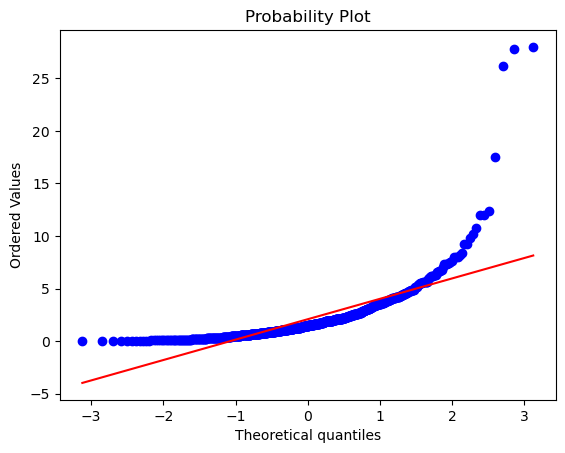

In [27]:
stats.probplot(df_analise.diff_sex_seg, dist="norm", plot=pylab)
pylab.show()

**Teste estatístico**

*Pergunta: a média dos retornos da segunda-feira é estatisticamente menor que a média dos retornos da sexta-feira que a precede?*

* Hipótese H0 (nula): As médias de retorno <u>não diferem</u> estatisticamente
* Hipótese H1 (alternativa): As médias de retorno  <u>diferem</u> estatisticamente

In [28]:
stats.ttest_rel(df_analise.Monday, df_analise.Friday)

TtestResult(statistic=-23.31694705640703, pvalue=1.679447467407953e-91, df=774)

##### **Apesar da falta de normalidade, o Teste T Pareado foi realizado nas diferenças entre os retornos de sexta e segunda-feira.**  
##### **O p-valor de 0.0028 indica que há uma diferença estatisticamente significativa entre os retornos de sexta e segunda-feira analisando o histórico completo de dados.**  
##### **No entanto, dado que a normalidade não foi confirmada, esses resultados não oferecem segurança para afirmar que rejeitamos H0 analisando todo o período histórico de IBOV.**

### **Teste 4: Box-Cox para tentativa de normalidade das amostras**

Aplicar transformação de Box-Cox

In [29]:
df_analise['diff_sex_seg_boxcox'], fitted_lambda = stats.boxcox(df_analise['diff_sex_seg'] + 1 - df_analise['diff_sex_seg'].min())
print("Lambda de Box-Cox:", fitted_lambda)

Lambda de Box-Cox: -0.42932110042422206


Verificar normalidade da diferença com Box-Cox

In [30]:
teste_normalidade_boxcox = stats.normaltest(df_analise['diff_sex_seg_boxcox'].dropna())
print("Teste de Normalidade (Box-Cox):", teste_normalidade_boxcox)

Teste de Normalidade (Box-Cox): NormaltestResult(statistic=14.33115140258392, pvalue=0.000772733985432279)


##### **Após a aplicação da transformação de Box-Cox, o p-valor ainda é extremamente pequeno, o que indica que as diferenças transformadas ainda não seguem uma distribuição normal.**  
##### **Mesmo com a transformação de Box-Cox, não foi possível alcançar a normalidade dos dados, o que compromete a validade do Teste T Pareado realizado abaixo.**

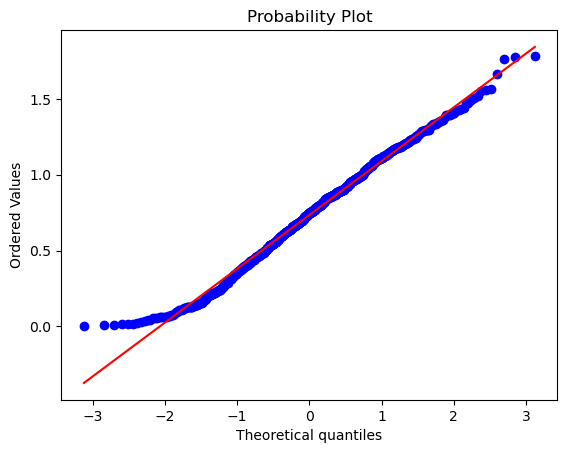

In [31]:
# Q-Q Plot para a diferença com Box-Cox
stats.probplot(df_analise['diff_sex_seg_boxcox'].dropna(), dist="norm", plot=pylab)
pylab.show()

Teste T pareado na diferença com Box-Cox

In [32]:
ttest_result_boxcox = stats.ttest_rel(df_analise['diff_sex_seg_boxcox'], np.zeros_like(df_analise['diff_sex_seg_boxcox']))
print("Teste T Pareado (Box-Cox):", ttest_result_boxcox)

Teste T Pareado (Box-Cox): TtestResult(statistic=57.67528882727309, pvalue=1.9060363626049596e-282, df=774)


##### **O p-valor de 0.0 indica uma diferença estatisticamente significativa entre os retornos de sexta-feira e segunda-feira. No entanto, com a falta de normalidade entre as amostras.**

### **Teste 5: Wilcoxon corroborando a rejeição de H0**

Teste de Wilcoxon para as diferenças entre sexta e segunda-feira

In [33]:
wilcoxon_result = stats.wilcoxon(df_analise['Friday'], df_analise['Monday'])
print("Teste de Wilcoxon:", wilcoxon_result)

Teste de Wilcoxon: WilcoxonResult(statistic=0.0, pvalue=1.6621246602157912e-128)


### **Considerações Finais:**

**Normalidade das Diferenças:**

- Teste 1: As diferenças entre os retornos seguem uma distribuição aproximadamente normal, conforme indicado pelo p-valor do teste de normalidade.
- Teste 2: A distribuição das diferenças não é normal, o que pode impactar a validade do Teste T Pareado, que assume a normalidade das diferenças.
- Teste 3: Mesmo com a transformação logarítmica, a distribuição das diferenças ainda não foi normal, o que necessitou a execução de mais dois testes:
- Teste 4: Box-Cox, que também não apresentou normalidade das diferenças, invalidando novamente o Teste T Pareado.
- Teste 5: Teste de Wilcoxon, que finalmente possibilitou a rejeição de H0 sem a necessidade de normalização. 

**Resultados do Teste T Pareado:**

- Teste 1: O Teste T Pareado não encontrou uma diferença estatisticamente significativa entre os retornos de sexta-feira e segunda-feira (p-valor = 0.764).  
Conclusão: Falha em rejeitar H0, indicando que não há evidências de um "weekend effect" no período de 2022 até a atualidade.

- Teste 2: O Teste T Pareado encontrou uma diferença estatisticamente significativa entre os retornos de sexta-feira e segunda-feira (p-valor = 0.0028).  
Conclusão: Embora o teste sugira uma diferença significativa, a falta de normalidade das diferenças compromete a validade do resultado.

- Teste 3: Mesmo após a aplicação da transformação logarítmica, o Teste T Pareado ainda indicou uma diferença significativa (p-valor = 0.0028).  
Conclusão: A falta de normalidade persiste, e nos sugere cautela na interpretação dos resultados.

- Teste 4: O Teste T Pareado foi realizado após a transformação de Box-Cox e indicou uma diferença altamente significativa (p-valor = 0.0).  
Conclusão: Apesar do resultado significativo, a ausência de normalidade, mesmo após a transformação, compromete a interpretação do Teste T Pareado.

- Teste 5: Não se aplica o Teste T Pareado, pois foi usado o Teste de Wilcoxon, que não requer normalidade.  
Conclusão: O Teste de Wilcoxon rejeitou H0, confirmando a existência do "weekend effect" no histórico completo do IBOVESPA.

**Linha temporal menor (desde 2022):**  
- O Teste T Pareado indica que não há evidências suficientes para concluir que existe um "weekend effect".  
Portanto, para um período mais curto, é seguro afirmar que o "weekend effect" não está presente.

**Linha temporal de todo o histórico:**  
- Foi percebido que mesmo sem a normalidade das amostras, o Teste T Pareado já apontava o resultado do teste seguinte:

- O Teste de Wilcoxon, ao ser aplicado na linha temporal maior e sem a necessidade de normalização, confirma que podemos rejeitar a hipótese nula.  
Podemos afirmar que o "weekend effect" existe ao longo de todo o período histórico do IBOVESPA.

### **Link do livro "Beyond The Random Walk: A Guide to Stock Market Anomalies and Low-Risk Investing":**

https://academic.oup.com/book/54648/chapter-abstract/422635057?redirectedFrom=fulltext&login=false